# Université Moulay Ismail
## FS Meknès Département d'Informatique
### Parcours d'excellence : SDIA – S6
#### AU 2024-2025

# TP 3: Classification

## 1. Développement d'un programme de classification binaire

La première étape consiste à générer des données aléatoires avec la fonction `make_classification`.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier

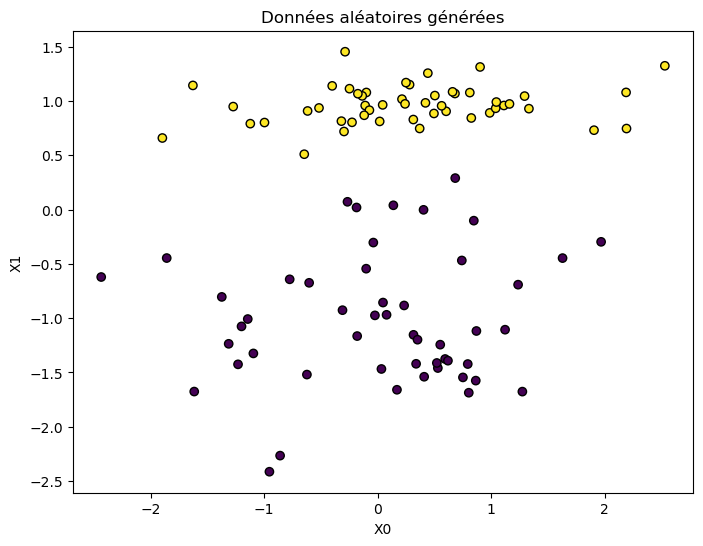

(100, 2)


In [15]:
# Génération de données aléatoires : 100 exemples, 2 classes, 2
# features x0 et x1
np.random.seed(1)
x, y = make_classification(n_samples=100, n_features=2,
                           n_redundant=0, n_informative=1,
                           n_clusters_per_class=1)

# Visualisation des données
plt.figure(num=None, figsize=(8, 6))
plt.scatter(x[:,0], x[:, 1], marker = 'o', c=y, edgecolors='k')
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Données aléatoires générées')
plt.show()

print(x.shape)
# Expected output: (100, 2)

Deuxième étape on doit créer un modèle en utilisant `SGDClassifier`.

In [16]:
# Génération d'un modele en utilisant la fonction cout 'log_loss'
# pour Logistic Regression
model_sgd = SGDClassifier(max_iter=1000, eta0=0.001, loss='log_loss')
model_sgd.fit(x, y)
score_sgd = model_sgd.score(x, y)
print('score:', score_sgd)
# Expected output might be around: score: 0.86 (will vary slightly based on exact library versions)

score: 1.0


Troisième étape, une fois le modèle entraîné, on peut afficher sa frontière de décision avec le code suivant :

C:\Users\FERRA\AppData\Local\Temp\ipykernel_25124\885500851.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[idx, 0], x[idx, 1], color=color_char,


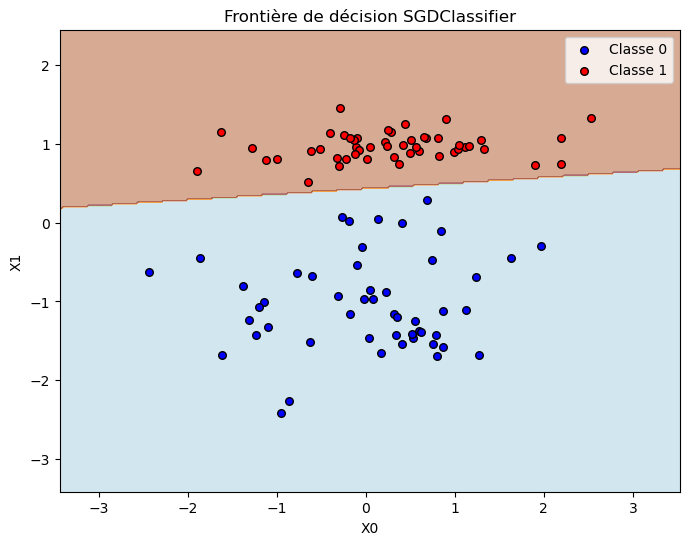

In [17]:
# Visualisation de la frontière de décision
h = .02  # step size in the mesh
colors = "bry" # blue, red, yellow - for up to 3 classes if needed

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model_sgd.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5) # Added alpha for better visualization
plt.axis('tight')

# Plotter aussi les points d'entraînement
# model_sgd.classes_ will give the unique class labels (e.g., [0, 1])
# colors string will be indexed by these class labels if they are 0, 1, 2...
# If classes are not 0, 1... map them or adjust color selection
for i, color_char in zip(model_sgd.classes_, colors[:len(model_sgd.classes_)]):
    idx = np.where(y == i)
    plt.scatter(x[idx, 0], x[idx, 1], color=color_char,
                label=f'Classe {i}',
                cmap=plt.cm.Paired, edgecolor='black', s=30) # s is marker size

plt.title('Frontière de décision SGDClassifier')
plt.xlabel('X0')
plt.ylabel('X1')
plt.legend()
plt.show()

On peut réutiliser ce code sur nos propres données pour prédire si un email est un spam ou encore si une tumeur est maligne ou non.

---

## 2. L'Algorithme de Nearest Neighbour : classification multi-classes

L'algorithme de Nearest Neighbour (le voisin le plus proche) permet de résoudre des problèmes de classification à plusieurs classes de façon simple et très efficace.

### Vision par ordinateur avec K-NN
Développement d'un programme capable de reconnaître un chiffre entre 0 et 9 écrits à la main. Voici les chiffres que la machine peut reconnaitre.

(L'image des chiffres manuscrits était ici)

Vous pouvez charger ces données depuis Sklearn (la librairie contient des Datasets de base).


In [22]:
# Import des libraires habituelles (numpy and plt already imported)
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier

Le code ci-dessous montre un exemple de chiffre présent dans le Dataset, c'est un exemple du chiffre 0.

Le Dataset comprend 1797 exemples, c'est-à-dire 1797 images, et que chaque exemple contient 64 features. Il s'agit de la valeur de chacun des 64 pixels qui forment les images.

Quand on soumet un nouveau chiffre à la machine, l'algorithme de K-NN trouve l'exemple du Dataset qui ressemble le plus à notre chiffre, basé sur le voisin le plus proche pour la valeur de chaque pixel.

In [23]:
# importons une base de données de chiffre
digits = load_digits()

X_digits = digits.data # Renamed to X_digits to avoid conflict with previous 'x'
y_digits = digits.target # Renamed to y_digits

print('dimension de X:', X_digits.shape)
# Expected output: dimension de X: (1797, 64)

dimension de X: (1797, 64)


L'étape suivante consiste à entraîner le modèle de Nearest Neighbour.
En exécutant le code suivant vous devriez obtenir un score de 99%, ce qui signifie que votre modèle reconnaitra le bon chiffre à 99%. Ceci représente un très bon pourcentage.

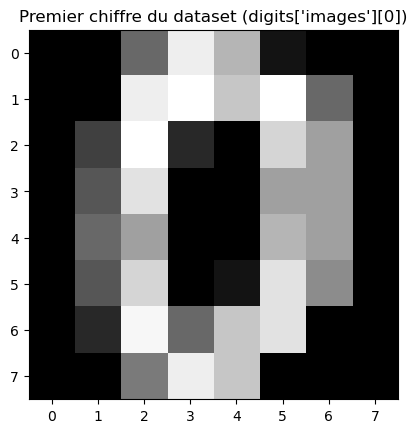

Score du modèle KNN: 0.9905397885364496


In [24]:
# visualisons un de ces chiffres
plt.imshow(digits['images'][0], cmap = 'Greys_r')
plt.title("Premier chiffre du dataset (digits['images'][0])")
plt.show()

# Entraînement du modele
model_knn = KNeighborsClassifier() # Renamed to model_knn
model_knn.fit(X_digits, y_digits)
score_knn = model_knn.score(X_digits, y_digits)
print("Score du modèle KNN:", score_knn)
# Expected output: Score du modèle KNN: 0.9905397885364496 (ou very close)

Après l'entrainement on va tester une image au hasard et voyons si la machine arrive à identifier le bon chiffre.

**Exemple :** on va tester la 100<sup>ième</sup> image de notre Dataset, qui est un 4...
résultat : la machine a su la reconnaître !

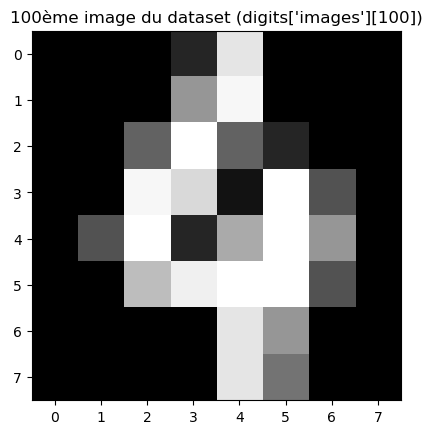

Prédiction de la machine pour la 100ème image: [4]
Valeur réelle de la 100ème image: 4


In [25]:
test_image_data = digits['images'][100].reshape(1, -1)
actual_image_to_show = digits['images'][100]

plt.imshow(actual_image_to_show, cmap = 'Greys_r')
plt.title(f"100ème image du dataset (digits['images'][100])")
plt.show()

prediction = model_knn.predict(test_image_data)
print("Prédiction de la machine pour la 100ème image:", prediction)
print("Valeur réelle de la 100ème image:", digits.target[100])
# Expected output: Prédiction de la machine pour la 100ème image: array([4])
# Expected output: Valeur réelle de la 100ème image: 4